<a href="https://colab.research.google.com/github/VarvarOliver/2024-830528-/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C%20%D0%9C%D0%9E%20%D0%B4%D0%BB%D1%8F%20%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D1%80%D0%B0%D1%81%D1%87%D1%91%D1%82%D0%B0%20%D0%BE%D0%B1%D1%8A%D1%91%D0%BC%D0%B0%20%D0%BC%D0%B0%D1%82%D0%B5%D1%80%D0%B8%D0%B0%D0%BB%D0%BE%D0%B2%20%D0%B4%D0%B5%D1%82%D0%B0%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
start_time = time.time()

In [ ]:
# Загрузка данных
data = pd.read_csv('data_weight.csv', sep = ';')
data.head()

,material,material_type,density,turning,milling,cutting,bending,grinding,length,width,height,volume,weight,processing_degree,material_volume,material_weight
0,3,1,0.0078,0,0,1,0,1,42.0,12.0,0.5,191.03,1.49,0,196.76,1.53
1,3,1,0.0078,0,0,1,0,1,48.0,12.0,0.5,205.13,1.60,0,211.28,1.65
2,3,1,0.0078,0,0,1,0,1,60.0,12.0,0.5,234.62,1.83,0,241.65,1.88
3,3,1,0.0078,0,0,1,0,1,75.0,12.0,0.5,273.08,2.13,0,281.27,2.19
4,3,1,0.0078,0,0,1,0,1,85.0,12.0,0.5,297.44,2.32,0,306.36,2.39


In [ ]:
# Функция для поиска и визуализации выбросов в числовых данных
def detect_outliers(df, features):
    outlier_indices = []

    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        # Определение индексов выбросов
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

        # Визуализация выбросов
        #plt.figure(figsize=(8, 4))
        #sns.boxplot(x=df[col])
        #plt.title('Boxplot for ' + col)
        #plt.show()

    # Выборка уникальных индексов
    outlier_indices = list(set(outlier_indices))
    return len(outlier_indices), outlier_indices



In [ ]:
# Числовые признаки для анализа
numerical_features = ['density', 'length', 'width', 'height', 'volume', 'weight', 'material_volume']
num_outliers, outliers = detect_outliers(data, numerical_features)
print(f"Total number of outliers: {num_outliers}")
print(f"Indices of outliers: {outliers}")

Total number of outliers: 306
Indices of outliers: [512, 916, 513, 515, 514, 522, 523, 524, 525, 527, 535, 537, 538, 539, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 570, 571, 572, 573, 63, 81, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 120, 122, 123, 125, 132, 133, 134, 655, 807, 338, 339, 693, 702, 703, 374, 730, 731, 739, 740, 741, 744, 746, 747, 244, 245, 247, 248, 759, 250, 760, 558, 559, 258, 259, 776, 777, 778, 267, 780, 799, 801, 802, 803, 804, 805, 294, 806, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 816, 817, 818, 819, 820, 821, 822, 322, 323, 324, 839, 840, 842, 844, 333, 332, 849, 850, 851, 340, 341, 852, 855, 856, 857, 858, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 860, 358, 359, 360, 361, 362, 808, 357, 365, 401, 378, 368, 369, 880, 371, 881, 882, 883, 884, 885, 377, 886, 3

In [ ]:
# Анализ категориальных переменных
categorical_features = ['material', 'material_type', 'turning', 'milling', 'cutting', 'bending', 'grinding', 'processing_degree']
for col in categorical_features:
    print(f"\nFrequency distribution for {col}:")
    print(data[col].value_counts())


Frequency distribution for material:
material
8    119
1    110
6    106
4    101
3     99
2     98
5     97
7     97
0     94
Name: count, dtype: int64

Frequency distribution for material_type:
material_type
1    338
0    222
3    133
4     98
5     76
2     54
Name: count, dtype: int64

Frequency distribution for turning:
turning
0    674
1    247
Name: count, dtype: int64

Frequency distribution for milling:
milling
1    491
0    430
Name: count, dtype: int64

Frequency distribution for cutting:
cutting
1    920
0      1
Name: count, dtype: int64

Frequency distribution for bending:
bending
0    754
1    167
Name: count, dtype: int64

Frequency distribution for grinding:
grinding
1    696
0    225
Name: count, dtype: int64

Frequency distribution for processing_degree:
processing_degree
1    522
0    307
2     92
Name: count, dtype: int64


In [ ]:
# Удаление выбросов
cleaned_data = data.drop(outliers)

# Проверка размера нового датасета
print("New data size:", cleaned_data.shape)


New data size: (615, 16)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error


In [ ]:
# Загрузка данных
df = cleaned_data
df.head()

,material,material_type,density,turning,milling,cutting,bending,grinding,length,width,height,volume,weight,processing_degree,material_volume,material_weight
0,3,1,0.0078,0,0,1,0,1,42.0,12.0,0.5,191.03,1.49,0,196.76,1.53
1,3,1,0.0078,0,0,1,0,1,48.0,12.0,0.5,205.13,1.60,0,211.28,1.65
2,3,1,0.0078,0,0,1,0,1,60.0,12.0,0.5,234.62,1.83,0,241.65,1.88
3,3,1,0.0078,0,0,1,0,1,75.0,12.0,0.5,273.08,2.13,0,281.27,2.19
4,3,1,0.0078,0,0,1,0,1,85.0,12.0,0.5,297.44,2.32,0,306.36,2.39


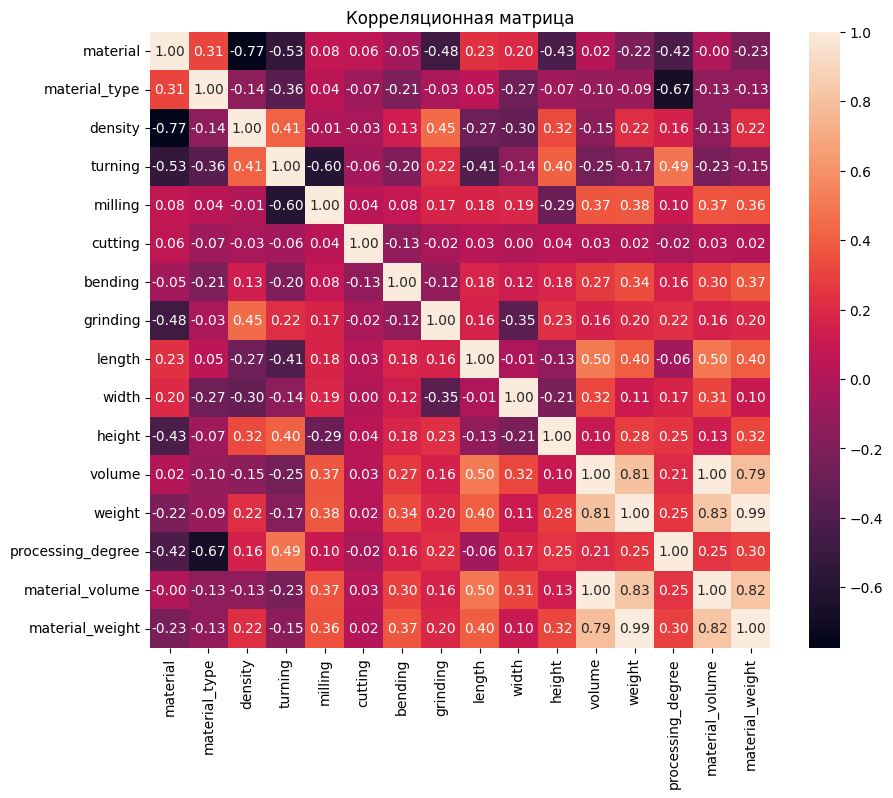

In [ ]:
# Создаем корреляционную матрицу
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
# Определение признаков
categorical_features = ['material', 'material_type', 'turning', 'milling', 'cutting', 'bending', 'grinding', 'processing_degree']
numeric_features = ['density', 'length', 'width', 'height', 'volume', 'weight', 'material_volume']

In [ ]:
# Разделение данных на признаки и целевую переменную
# Разделение данных
X = df[categorical_features + numeric_features]
y = df['material_weight']

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)

In [ ]:
# Предобработка данных
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Создание конвейера с предобработчиком и моделью линейной регрессии
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])



In [ ]:
# Обучение модели
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['density', 'length', 'width',
                                                   'height', 'volume', 'weight',
                                                   'material_volume']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['material', 'material_type',
                                                   'turning', 'milling',
                                                   'cutting', 'bending',
                                                   'grinding',
                                                   'processing_degree'])])),
                ('regressor', LinearRegression())])

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

In [ ]:
# Расчет метрик качества
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
#msle = mean_squared_log_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
#mmae = median_absolute_error(y_test, y_pred)
#print(f'median_absolute_error: {mmae}')
print(f'Mean Absolute Error: {mae}')
#print(f'Mean Squared Log Error: {msle}')

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.15396170763465444
Mean Squared Error: 0.08585659173891794
R^2 Score: 0.9993381028058631


In [ ]:
# Вывод фактических и предсказанных значений
#results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(results)

In [ ]:
# Предсказание на тренировочной и тестовой выборках
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
# Расчет метрик качества тренировочной выборки
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
print(f'Mean Squared Error: {mse_train}')
print(f'Mean Absolute Error: {mae_train}')
print(f'R^2 Score: {r2_train}')

Mean Squared Error: 0.06298005658572282
Mean Absolute Error: 0.12314026375127035
R^2 Score: 0.9995417478433546


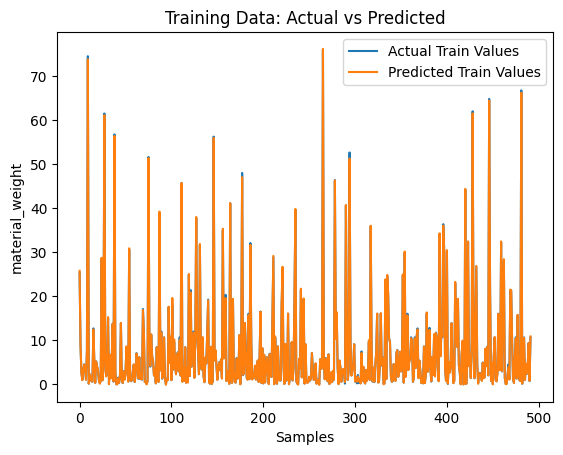

In [ ]:
# Визуализация результатов для тренировочной выборки
#plt.figure(figsize=(25, 10))
plt.plot(range(len(y_train)), y_train, label='Actual Train Values')
plt.plot(range(len(y_train)), y_train_pred, label='Predicted Train Values')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('material_weight')
plt.legend()

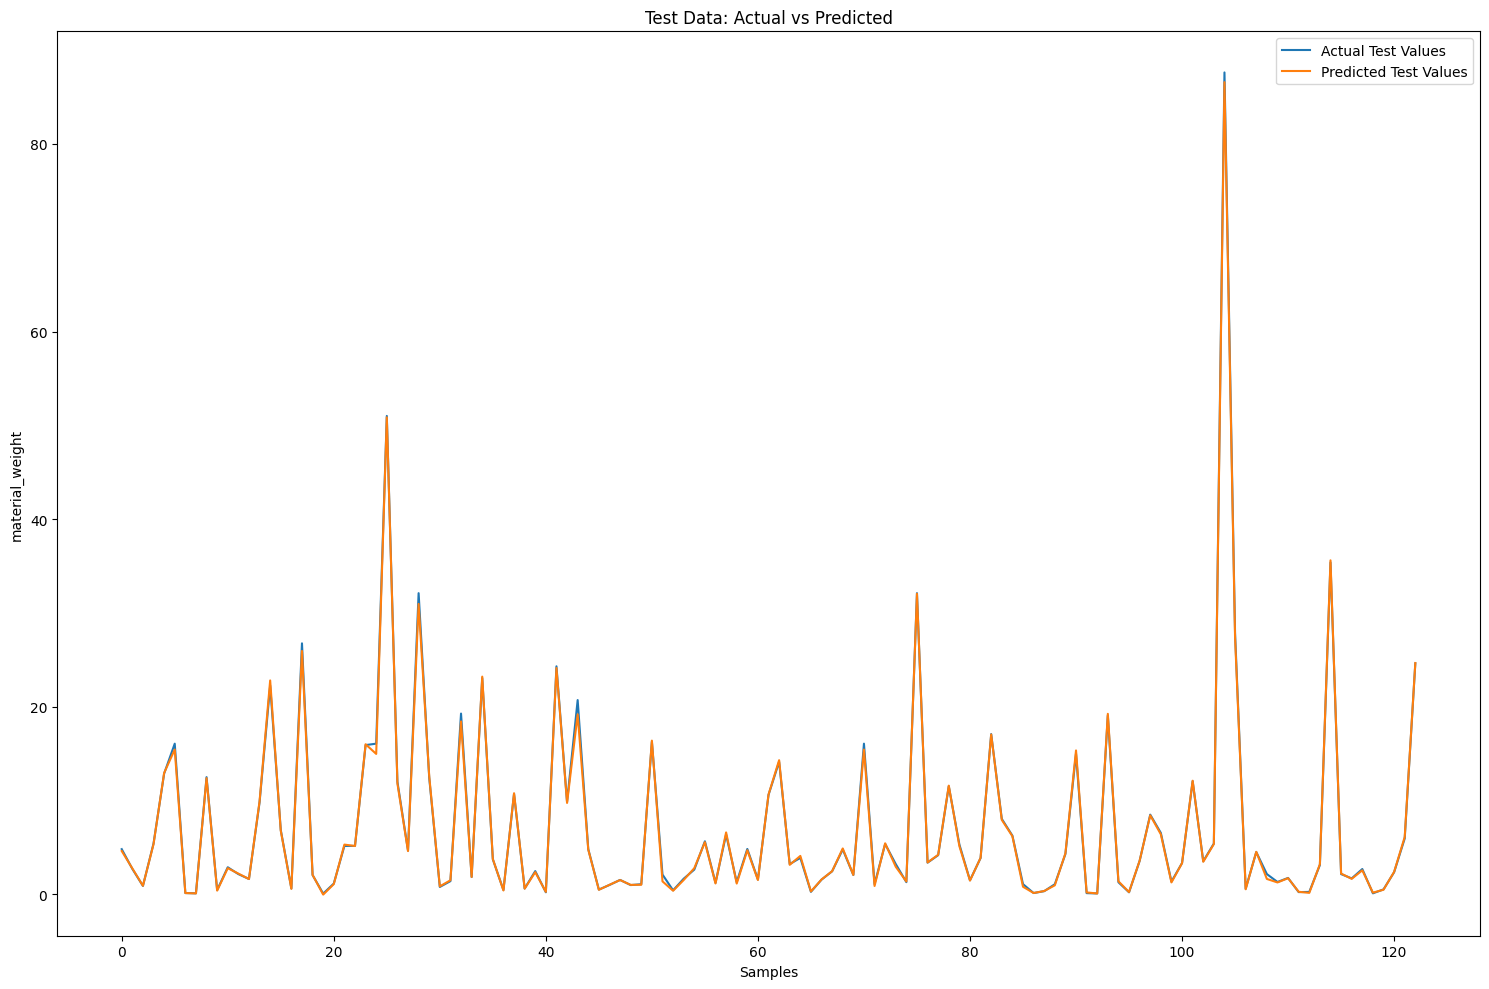

In [ ]:
# Визуализация результатов для тестовой выборки
plt.figure(figsize=(15, 10))
plt.plot(range(len(y_test)), y_test, label='Actual Test Values')
plt.plot(range(len(y_test)), y_test_pred, label='Predicted Test Values')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('material_weight')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Заканчиваем замер времени
end_time = time.time()

# Вычисляем и выводим общее время выполнения
total_time = end_time - start_time
print(f'Total execution time: {total_time} seconds')

Total execution time: 2.635394334793091 seconds
